# Load Data

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-05-31    float64
2022-06-30    float64
2022-07-31    float64
2022-08-31    float64
2022-09-30    float64
Length: 281, dtype: object

## Filter out the 4 largest cities

In [4]:
df1=df[df['SizeRank']<4].copy()
df1.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt data

In [5]:
df1.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted=pd.melt(df1.drop(columns=['RegionID','RegionType','StateName','SizeRank','State', 'Metro']),
               id_vars=['CountyName','RegionName'],
                #value_name='keyword operator from-rainbow'>='Confirmed',
              var_name='Date')
melted

,CountyName,RegionName,Date,value
0,Queens County,New York,2000-01-31,253690.0
1,Los Angeles County,Los Angeles,2000-01-31,234181.0
2,Harris County,Houston,2000-01-31,109068.0
3,Cook County,Chicago,2000-01-31,166139.0
4,Queens County,New York,2000-02-29,255517.0
...,...,...,...,...
1087,Cook County,Chicago,2022-08-31,315587.0
1088,Queens County,New York,2022-09-30,781622.0
1089,Los Angeles County,Los Angeles,2022-09-30,966595.0
1090,Harris County,Houston,2022-09-30,272639.0


## Convert date column into datetime data type and set to index

In [7]:
melted['Date']=pd.to_datetime(melted['Date'],format='%Y %m %d')
melted=melted.set_index('Date')
melted.info()
melted.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountyName  1092 non-null   object 
 1   RegionName  1092 non-null   object 
 2   value       1087 non-null   float64
dtypes: float64(1), object(2)
memory usage: 34.1+ KB


,CountyName,RegionName,value
Date,,,
2000-01-31,Queens County,New York,253690.0
2000-01-31,Los Angeles County,Los Angeles,234181.0
2000-01-31,Harris County,Houston,109068.0
2000-01-31,Cook County,Chicago,166139.0
2000-02-29,Queens County,New York,255517.0


In [8]:
melted.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

### Groupby City

In [9]:
melt=melted.groupby('RegionName').resample('M').mean()
melt

/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1554/488109832.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melt=melted.groupby('RegionName').resample('M').mean()
/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1554/488109832.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melt=melted.groupby('RegionName').resample('M').mean()
/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1554/488109832.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_onl

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

### Calling .unstack()

In [11]:
melt.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [12]:
melt.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [14]:
unstacked=melt.unstack(level=0)
unstacked

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

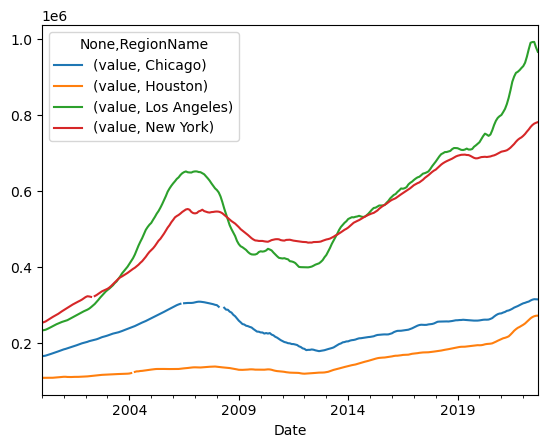

In [16]:
ax=unstacked.plot()

In [17]:
unstacked.columns

MultiIndex([('value',     'Chicago'),
            ('value',     'Houston'),
            ('value', 'Los Angeles'),
            ('value',    'New York')],
           names=[None, 'RegionName'])

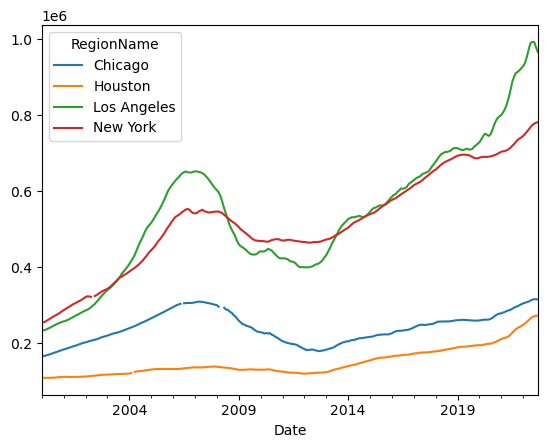

In [18]:
ax=unstacked['value'].plot()

In [19]:
import matplotlib.ticker as mticks

In [21]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)


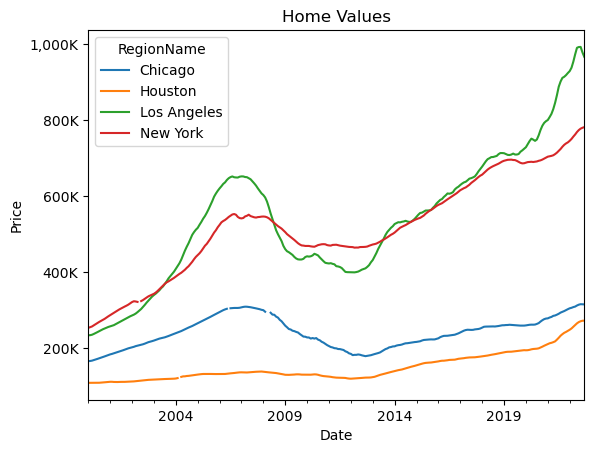

In [25]:
ax=unstacked['value'].plot(title='Home Values')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(fmt_thous);

# 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [27]:
unstacked.loc[pd.IndexSlice['2008'],:]

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-01-31  300207.0  138208.0    603029.0  546538.0
2008-02-29  296063.0  137512.0    596635.0  546098.0
2008-03-31       NaN  136795.0    586065.0  544562.0
2008-04-30       NaN  136628.0    571226.0  541865.0
2008-05-31  293467.0  136228.0    554589.0  537685.0
2008-06-30  288495.0  135773.0    539622.0  533810.0
2008-07-31  288174.0  135392.0    524220.0  529211.0
2008-08-31  283199.0  134770.0    510520.0  525290.0
2008-09-30  280695.0  133932.0    500124.0  521347.0
2008-10-31  274849.0  133189.0    490979.0  518048.0
2008-11-30  271059.0  132247.0    481905.0  514767.0
2008-12-31  265306.0  131283.0    469294.0  510309.0

# 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [28]:
un_diff=unstacked.diff()
un_diff

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2000-01-31     NaN     NaN         NaN      NaN
2000-02-29   397.0    11.0       220.0   1827.0
2000-03-31   832.0  -201.0      1112.0   1690.0
2000-04-30  1458.0     3.0      2076.0   3103.0
2000-05-31  1673.0   -47.0      2524.0   2894.0
...            ...     ...         ...      ...
2022-05-31  2838.0  4457.0     17223.0   6476.0
2022-06-30  2176.0  3343.0      1946.0   5147.0
2022-07-31  1247.0  2158.0       293.0   3748.0
2022-08-31  -323.0  1341.0    -14434.0   2268.0
2022-09-30  -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [29]:
un_diff.loc[pd.IndexSlice['11/01/2008':'12/01/2008'],:]

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-11-30 -3790.0  -942.0     -9074.0  -3281.0